In [5]:
import shapefile
import shapely.geometry as geometry
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import copy
import glob

In [2]:
shp_file = shapefile.Reader('./Neighborhood_Councils_(Certified).shp')
all_shp = shp_file.shapes()

In [7]:
num_bird = np.zeros(len(all_shp))

bird_files = glob.glob('./data/Bird/*/*12021*.csv')

for file in bird_files:
    with open(file) as loc_file:
        _ = loc_file.readline()
        locs = loc_file.readlines()

    pts = []
    for loc in locs:
        pts.append([float(loc.split(',')[2]), float(loc.split(',')[1])])
    pts = np.array(pts)

    pts_ = copy.copy(pts)
    for i in range(len(all_shp)):
        shp = geometry.shape(all_shp[i])
        tmp = []
        for j in range(len(pts_)):
            if geometry.Point(pts_[j]).within(shp):
                num_bird[i] += 1
                tmp.append(j)
        pts_ = np.delete(pts_, tmp, axis=0)
num_bird = num_bird / len(bird_files)

In [14]:
num_wheels = np.zeros(len(all_shp))

wheels_files = glob.glob('./data/wheels/*/*12021*.csv')

for file in wheels_files:
    with open(file) as loc_file:
        _ = loc_file.readline()
        locs = loc_file.readlines()

    pts = []
    for loc in locs:
        pts.append([float(loc.split(',')[2]), float(loc.split(',')[1])])
    pts = np.array(pts)

    pts_ = copy.copy(pts)
    for i in range(len(all_shp)):
        shp = geometry.shape(all_shp[i])
        tmp = []
        for j in range(len(pts_)):
            if geometry.Point(pts_[j]).within(shp):
                num_wheels[i] += 1
                tmp.append(j)
        pts_ = np.delete(pts_, tmp, axis=0)
num_wheels = num_wheels / len(wheels_files)

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator(central_longitude=-118.4, min_latitude=33.6, max_latitude=34.4)
data_crs = ccrs.PlateCarree()

map_range_plt = [-118.7, -118.1, 33.6, 34.4]

/var/folders/6_/qdy6tryj2kz2qx0qxkchmt480000gn/T/ipykernel_4212/2693816184.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu_r', 60)


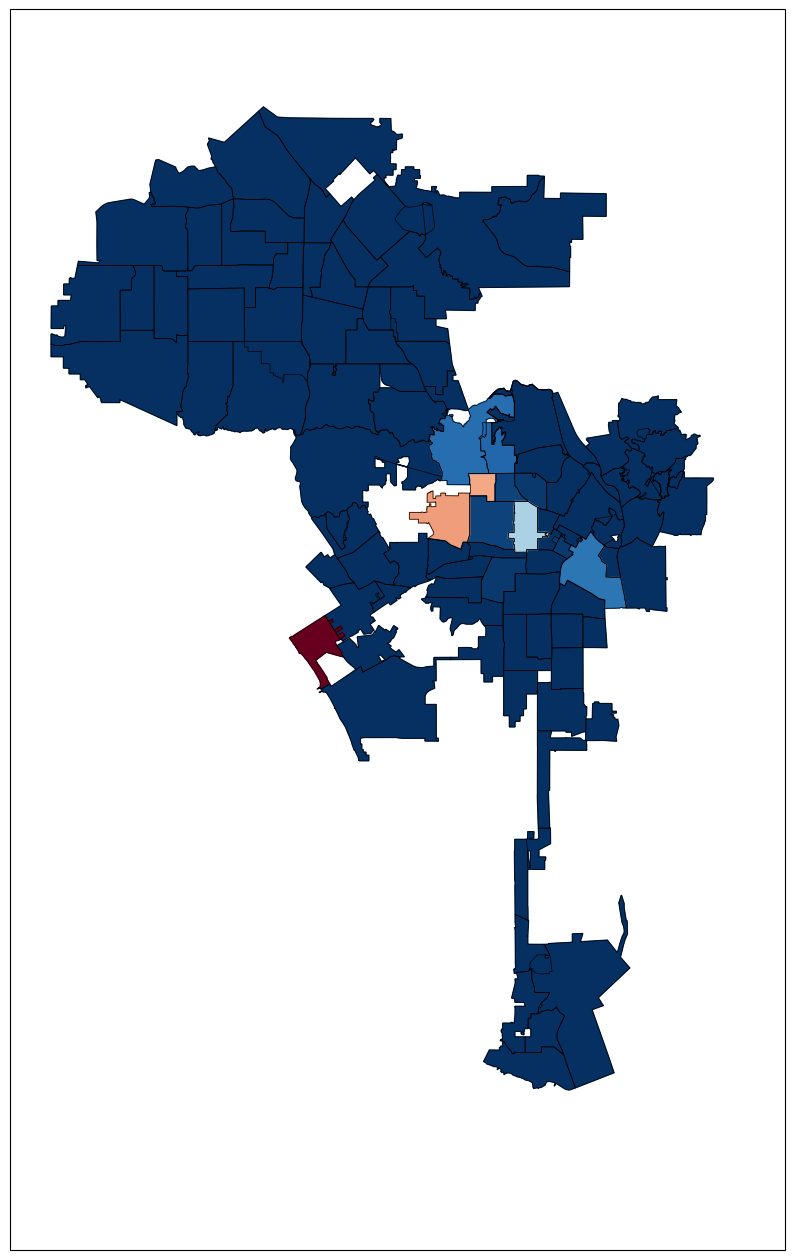

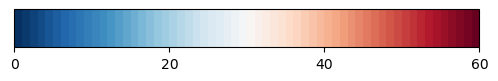

In [36]:
c_list = [int(i) for i in num_wheels]

cmap = cm.get_cmap('RdBu_r', 60)

fig = plt.figure(figsize=[10, 20])
ax = fig.add_subplot(1,1,1, projection=proj)

for i in range(len(all_shp)):
    pts = np.array(all_shp[i].points)
    plt.fill(pts[:,0], pts[:,1], color=cmap(c_list[i]), transform=data_crs)
    plt.plot(pts[:,0], pts[:,1], 'k', linewidth=0.5, transform=data_crs)
plt.savefig('wheels.png', format='png')
ax.set_extent(map_range_plt, crs=ccrs.PlateCarree())


def show_cmap(cmap, norm=None, extend=None):
    if norm is None:
        norm = mcolors.Normalize(vmin=0, vmax=cmap.N)
    im = cm.ScalarMappable(norm=norm, cmap=cmap)

    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    cbar = fig.colorbar(im, cax=ax, orientation='horizontal', extend=extend, ticks=[0, 20, 40, 60])
    cbar.ax.set_xticklabels(['0', '20', '40', '60'])
    plt.show()
show_cmap(cmap)

/var/folders/6_/qdy6tryj2kz2qx0qxkchmt480000gn/T/ipykernel_4212/582188724.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu_r', 300)


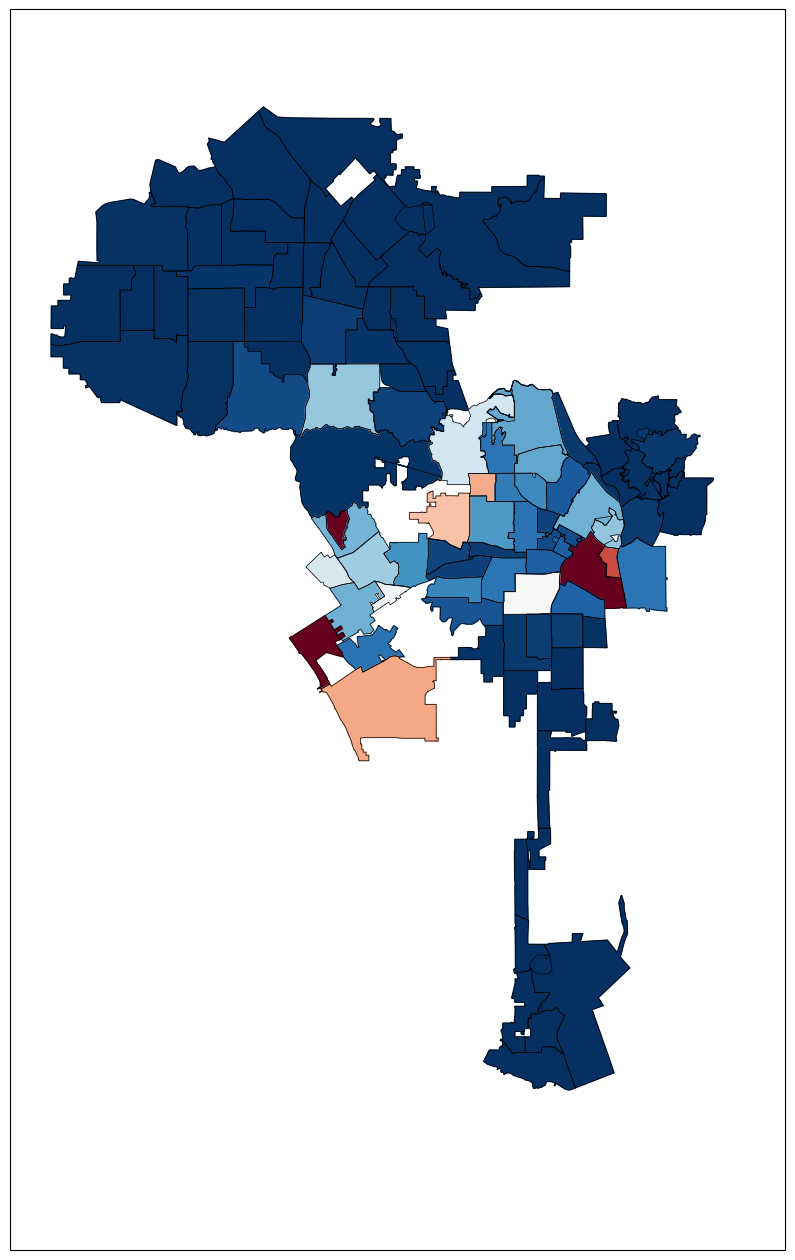

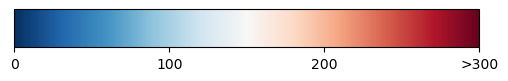

In [33]:
c_list = [int(i) for i in num_bird]

cmap = cm.get_cmap('RdBu_r', 300)

fig = plt.figure(figsize=[10, 20])
ax = fig.add_subplot(1,1,1, projection=proj)

for i in range(len(all_shp)):
    pts = np.array(all_shp[i].points)
    plt.fill(pts[:,0], pts[:,1], color=cmap(c_list[i]), transform=data_crs)
    plt.plot(pts[:,0], pts[:,1], 'k', linewidth=0.5, transform=data_crs)
plt.savefig('bird.png', format='png')
ax.set_extent(map_range_plt, crs=ccrs.PlateCarree())


def show_cmap(cmap, norm=None, extend=None):
    if norm is None:
        norm = mcolors.Normalize(vmin=0, vmax=cmap.N)
    im = cm.ScalarMappable(norm=norm, cmap=cmap)

    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    cbar = fig.colorbar(im, cax=ax, orientation='horizontal', extend=extend, ticks=[0, 100, 200, 300])
    cbar.ax.set_xticklabels(['0', '100', '200', '>300'])
    plt.show()
show_cmap(cmap)